In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('DataWPred')

In [4]:
df.head()

,Rent,Deposit,Meterage,FloorNum_2,FloorNum_3,FloorNum_4,FloorNum_5,District_2,District_3,District_4,District_5,NoB_2,NoB_3,NoB_4,Elevator_1,DoB_1400s,DoB_Before 1390,Balcony_1,nRent,y_pred
0,0.347826,0.101266,0.346154,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0.449092,0.423235
1,0.101449,0.037975,0.134615,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0.139424,0.133243
2,0.028986,0.088608,0.153846,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0.117593,0.073977
3,0.072464,0.025316,0.230769,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.097780,0.314402
4,0.094203,0.068354,0.292308,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.162557,0.255466


In [5]:
df = df.drop(['Rent' , 'Deposit'] , axis=1)

In [6]:
df.head()

,Meterage,FloorNum_2,FloorNum_3,FloorNum_4,FloorNum_5,District_2,District_3,District_4,District_5,NoB_2,NoB_3,NoB_4,Elevator_1,DoB_1400s,DoB_Before 1390,Balcony_1,nRent,y_pred
0,0.346154,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0.449092,0.423235
1,0.134615,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0.139424,0.133243
2,0.153846,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0.117593,0.073977
3,0.230769,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.097780,0.314402
4,0.292308,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.162557,0.255466


In [7]:
residuals = df['nRent'] - df['y_pred']

Text(0.5, 1.0, 'Residual Plot')

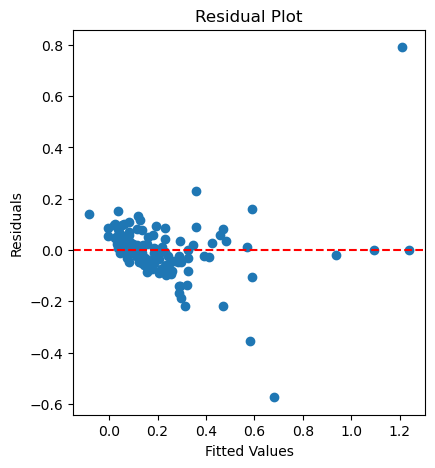

In [8]:
# 1. Residual Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['y_pred'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

In [9]:
rsv = residuals.sort_values()

In [10]:
from scipy import stats
shapiro , p_value = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test {shapiro:.4f}")
print(f"P-value: {p_value:}")

Shapiro-Wilk Test 0.7565
P-value: 6.04684054564264e-13


In [11]:
# این تست به ما نشون میده که دیتای ما نرمال نیست به هیج وجه چون پی ولیو از ۰.۰۵ کوچیکتره پس فرض ما که داده های ما نرمال است رد میشه

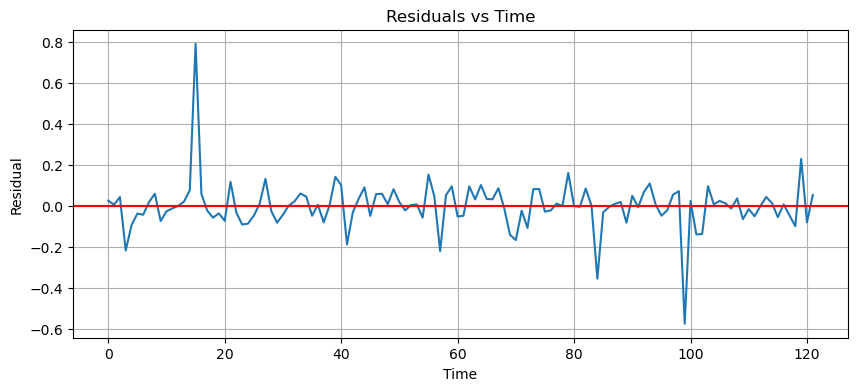

In [14]:
residuals = np.asarray(residuals)
time = np.arange(len(residuals))

plt.figure(figsize=(10, 4))
plt.plot(time, residuals)
plt.axhline(0, color='red')
plt.title("Residuals vs Time")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.grid(True)
plt.show()

/Users/pouniq/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


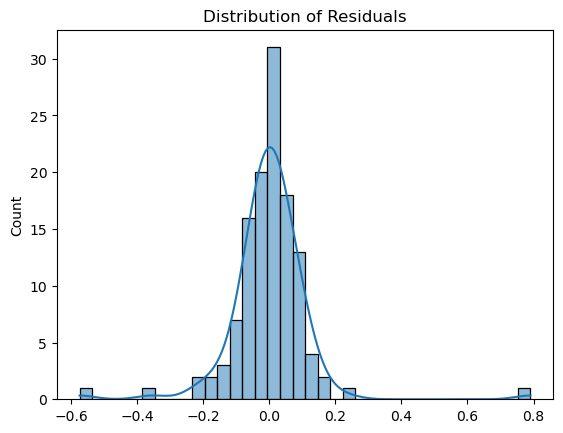

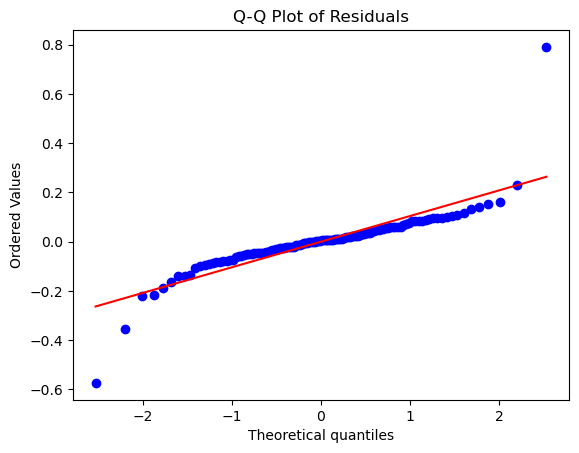

In [15]:
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

stats.probplot(residuals, plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()